In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

### Importing the Data

In [2]:
listings = pd.read_csv('./data/listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,42384166,https://www.airbnb.com/rooms/42384166,20220920074636,2022-09-20,city scrape,Practical Apartment,The apartment just got renovated! The simple b...,NaN,https://a0.muscache.com/pictures/49b4fdd9-78ea...,337177735,...,4.67,4.47,4.40,00001374706,t,1,1,0,0,0.96
1,31100111,https://www.airbnb.com/rooms/31100111,20220920074636,2022-09-20,city scrape,Σπιτι 2ος κοντα στο ηλεκτρικο καλλιθεας Αττικης,Προσφατα ανακαινισμένο διαμερισμα ενος μεγαλου...,η γειτονια γενικα ειναι ήσυχη,https://a0.muscache.com/pictures/4be77902-7337...,90434832,...,4.00,4.17,3.83,NaN,t,3,3,0,0,0.15
2,36967991,https://www.airbnb.com/rooms/36967991,20220920074636,2022-09-20,city scrape,Lux Studio 1,5 λεπτά από τον ηλεκτρικό σταθμό Καλλιθέας. Εύ...,Ευχάριστη γειτονιά με έντονο ελληνικό χαρακτήρ...,https://a0.muscache.com/pictures/c19a4a64-da8b...,277896558,...,4.90,4.78,4.79,00000770524,t,2,2,0,0,2.91
3,638115689290380035,https://www.airbnb.com/rooms/638115689290380035,20220920074636,2022-09-20,city scrape,Όμορφο διαμέρισμα στον Άγιο Ιωάννη Ρέντη,Απολαύστε μια εμπειρία γεμάτη στιλ σε αυτόν το...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,461642253,...,NaN,NaN,NaN,00001592182,f,1,1,0,0,NaN
4,20824802,https://www.airbnb.com/rooms/20824802,20220920074636,2022-09-20,city scrape,Comfortable and Spacious 2 bdr Apt,Ideally located in the heart of Athens in the ...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,748818,...,4.92,4.92,5.00,1404941,t,76,61,15,0,0.26


In [3]:
reviews = pd.read_csv('./data/reviews.csv')

In [4]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10595,271535,2011-05-20,189305,Pamela,"The apartment was wonderful, fully equiped, be..."
1,10595,1994237,2012-08-15,289831,Andrey,Emmanouil was an excellent host. He provided u...
2,10595,4678609,2013-05-20,2635427,Ahmet,"Manos is a very good host, he is kind and help..."
3,10595,12502994,2014-05-04,2422327,Hema,"Our stay in Emmanouil home was comfortable, qu..."
4,10595,19482948,2014-09-13,6737784,Mariana,Fantastic accommodation very well located to v...


In [5]:
listings.shape

(12165, 75)

In [6]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [7]:
reviews.shape

(536698, 6)

### Cleaning Listings

In [8]:
listings = listings[['id',
                    'description', 
                    'neighborhood_overview', 
                    'host_id',
                    'host_response_time',
                    'host_is_superhost', 
                    'host_total_listings_count', 
                    'host_identity_verified', 
                    'latitude',
                    'longitude',
                    'property_type', 
                    'room_type', 
                    'accommodates',
                    'bathrooms',
                    'bathrooms_text',
                    'bedrooms',
                    'beds',
                    'price',
                    'minimum_nights',
                    'maximum_nights',
                    'number_of_reviews',
                    'review_scores_rating',
                    'instant_bookable',
                    'calculated_host_listings_count'  
                    
                   ]]

In [9]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
listings.head()

,id,description,neighborhood_overview,host_id,host_response_time,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count
0,42384166,The apartment just got renovated! The simple b...,NaN,337177735,within an hour,f,1.0,f,37.94835,23.70327,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,$35.00,2,7,30,4.37,t,1
1,31100111,Προσφατα ανακαινισμένο διαμερισμα ενος μεγαλου...,η γειτονια γενικα ειναι ήσυχη,90434832,within a few hours,f,9.0,t,37.95633,23.69534,Entire rental unit,Entire home/apt,3,NaN,1 bath,1.0,3.0,$22.00,7,90,6,3.67,t,3
2,36967991,5 λεπτά από τον ηλεκτρικό σταθμό Καλλιθέας. Εύ...,Ευχάριστη γειτονιά με έντονο ελληνικό χαρακτήρ...,277896558,within an hour,t,2.0,t,37.95672,23.69589,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,$36.00,2,1125,112,4.85,t,2
3,638115689290380035,Απολαύστε μια εμπειρία γεμάτη στιλ σε αυτόν το...,NaN,461642253,within a few hours,f,1.0,f,37.96567,23.67686,Entire condo,Entire home/apt,4,NaN,2 baths,2.0,3.0,$80.00,2,365,0,NaN,f,1
4,20824802,Ideally located in the heart of Athens in the ...,NaN,748818,within an hour,f,594.0,t,37.95961,23.70250,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,4.0,$120.00,1,1125,13,5.00,t,76


In [10]:
listings.isnull().sum()

id                                    0
description                          67
neighborhood_overview              4404
host_id                               0
host_response_time                 1342
host_is_superhost                     0
host_total_listings_count             1
host_identity_verified                1
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                         12165
bathrooms_text                        7
bedrooms                            933
beds                                127
price                                 0
minimum_nights                        0
maximum_nights                        0
number_of_reviews                     0
review_scores_rating               1973
instant_bookable                      0
calculated_host_listings_count        0
dtype: int64

In [11]:
listings.shape

(12165, 24)

In [12]:
listings.drop(columns = ['description', 'neighborhood_overview', 'bathrooms'], inplace = True)

We decided to drop description and neighborhood_overview because they were subjective descriptions of the airbnb property and to compare our two models, we are interested in comparing objective features of the property (to the extent that they are reported correctly) with the subjective review comments. We dropped bathrooms because the entire column was null and that information was captured in the bathrooms_text column.

In [13]:
listings.dropna(subset =['review_scores_rating'], inplace = True)

We dropped null values in the review_scores_rating column because that was the column we are interested in predicting

In [14]:
listings.isnull().sum()

id                                  0
host_id                             0
host_response_time                876
host_is_superhost                   0
host_total_listings_count           0
host_identity_verified              0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms_text                      6
bedrooms                          815
beds                              100
price                               0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating                0
instant_bookable                    0
calculated_host_listings_count      0
dtype: int64

In [15]:
listings.head()

,id,host_id,host_response_time,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count
0,42384166,337177735,within an hour,f,1.0,f,37.94835,23.70327,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,$35.00,2,7,30,4.37,t,1
1,31100111,90434832,within a few hours,f,9.0,t,37.95633,23.69534,Entire rental unit,Entire home/apt,3,1 bath,1.0,3.0,$22.00,7,90,6,3.67,t,3
2,36967991,277896558,within an hour,t,2.0,t,37.95672,23.69589,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,$36.00,2,1125,112,4.85,t,2
4,20824802,748818,within an hour,f,594.0,t,37.95961,23.70250,Entire rental unit,Entire home/apt,4,1 bath,2.0,4.0,$120.00,1,1125,13,5.00,t,76
6,34796120,262360777,within an hour,f,1.0,t,37.98711,23.67311,Entire rental unit,Entire home/apt,3,1 bath,1.0,1.0,$28.00,2,1125,59,4.85,t,1


In [16]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10192 entries, 0 to 12161
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10192 non-null  int64  
 1   host_id                         10192 non-null  int64  
 2   host_response_time              9316 non-null   object 
 3   host_is_superhost               10192 non-null  object 
 4   host_total_listings_count       10192 non-null  float64
 5   host_identity_verified          10192 non-null  object 
 6   latitude                        10192 non-null  float64
 7   longitude                       10192 non-null  float64
 8   property_type                   10192 non-null  object 
 9   room_type                       10192 non-null  object 
 10  accommodates                    10192 non-null  int64  
 11  bathrooms_text                  10186 non-null  object 
 12  bedrooms                        

In [17]:
listings['price'] = listings['price'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)

Code adapted from https://stackoverflow.com/questions/32464280/converting-currency-with-to-numbers-in-python-pandas

We converted price from an object to a float. The remainder of the object columns we left untouched because they contained categorical data that we will create dummy variables for.

In [18]:
listings = listings.drop(columns = ['host_id'])

In [19]:
listings.isnull().sum()

id                                  0
host_response_time                876
host_is_superhost                   0
host_total_listings_count           0
host_identity_verified              0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms_text                      6
bedrooms                          815
beds                              100
price                               0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating                0
instant_bookable                    0
calculated_host_listings_count      0
dtype: int64

In [20]:
listings.shape

(10192, 20)

In [21]:
listings['bathrooms_text'].value_counts()

1 bath              7458
1.5 baths            990
2 baths              739
1 shared bath        265
1 private bath       258
2.5 baths            117
1.5 shared baths     101
3 baths               92
2 shared baths        33
3.5 baths             32
3 shared baths        26
4 baths               22
5 baths               10
4 shared baths         9
4.5 baths              8
Half-bath              5
2.5 shared baths       3
0 shared baths         3
0 baths                3
6.5 baths              2
5.5 baths              2
5 shared baths         2
Shared half-bath       1
9.5 baths              1
12 baths               1
8.5 baths              1
6 baths                1
7 baths                1
Name: bathrooms_text, dtype: int64

In [22]:
listings['bathrooms_text'].replace('1 private bath', '1 bath', inplace = True)

In [23]:
listings.drop(listings[listings['bathrooms_text'] == '0 baths'].index, inplace = True)

Although at intial glance each of these baths seem similar, when looking further almost all of them did represent different types that might have an impact on property ratings (ex: 2.5 baths vs 2.5 shared baths). We consolidated 1 private bath into 1 bath, assuming that shared bath would be specified as so and therefore the baths in the 1 bath category would also be private. We also dropped the rows with 0 baths because it seemed unlikely that a property would have zero baths. 

We need to get dummy variables for the categorical variables

In [24]:
listings_dummies = pd.get_dummies(listings, drop_first = True)

We need to impute for missing values in the host_response_time, bedrooms, and beds column

In [25]:
X = listings_dummies.drop(columns = ['review_scores_rating'])
y = listings_dummies['review_scores_rating']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 222)
X_train.shape, X_test.shape

((7641, 90), (2548, 90))

In [27]:
it_imp = IterativeImputer(estimator = LinearRegression())
it_train = it_imp.fit_transform(X_train)
it_test = it_imp.transform(X_test)

it_train = pd.DataFrame(it_train, columns = X.columns)
it_test = pd.DataFrame(it_test, columns = X.columns)

In [28]:
it_test.isnull().sum()

id                                                  0
host_total_listings_count                           0
latitude                                            0
longitude                                           0
accommodates                                        0
bedrooms                                            0
beds                                                0
price                                               0
minimum_nights                                      0
maximum_nights                                      0
number_of_reviews                                   0
calculated_host_listings_count                      0
host_response_time_within a day                     0
host_response_time_within a few hours               0
host_response_time_within an hour                   0
host_is_superhost_t                                 0
host_identity_verified_t                            0
property_type_Casa particular                       0
property_type_Cycladic home 

In [29]:
it_train.to_csv('./data/listings_Xtrain.csv')
it_test.to_csv('./data/listings_Xtest.csv')
y_train.to_csv('./data/ytrain.csv')
y_test.to_csv('./data/ytest.csv')

## EDA Listings

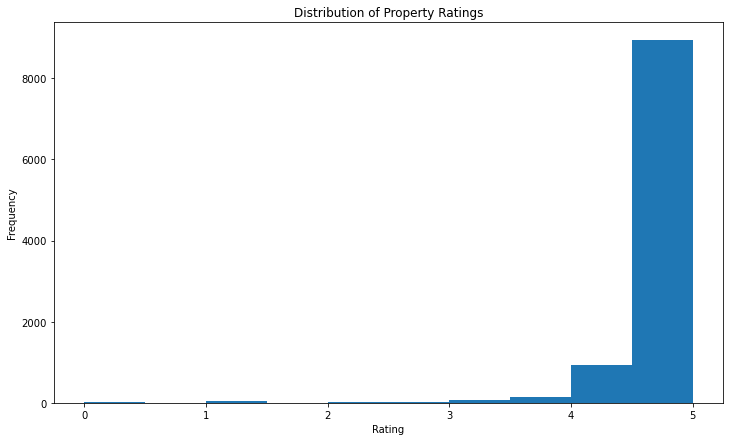

In [30]:
plt.figure(figsize = (12, 7))
plt.title('Distribution of Property Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.hist(listings['review_scores_rating']);

## Cleaning Reviews

In [31]:
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         24
dtype: int64

In [32]:
reviews.shape

(536698, 6)

In [33]:
reviews.dropna(inplace = True)
reviews.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

We felt fine dropping the null values because they were only 24 out of 536,698

In [34]:
ratings = listings[['id', 'review_scores_rating']]
ratings.rename(columns = {'id': 'listing_id'}, inplace = True)
ratings.head()

/var/folders/r1/szl7szs91f5bkjddv3cxyk8r0000gn/T/ipykernel_81114/3267173621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings.rename(columns = {'id': 'listing_id'}, inplace = True)


,listing_id,review_scores_rating
0,42384166,4.37
1,31100111,3.67
2,36967991,4.85
4,20824802,5.00
6,34796120,4.85


In [35]:
reviews['listing_id'].nunique()

10192

In [36]:
reviews = reviews.merge(ratings, on='listing_id', how='left')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_scores_rating
0,10595,271535,2011-05-20,189305,Pamela,"The apartment was wonderful, fully equiped, be...",4.79
1,10595,1994237,2012-08-15,289831,Andrey,Emmanouil was an excellent host. He provided u...,4.79
2,10595,4678609,2013-05-20,2635427,Ahmet,"Manos is a very good host, he is kind and help...",4.79
3,10595,12502994,2014-05-04,2422327,Hema,"Our stay in Emmanouil home was comfortable, qu...",4.79
4,10595,19482948,2014-09-13,6737784,Mariana,Fantastic accommodation very well located to v...,4.79


In [37]:
reviews.shape

(536674, 7)

In [38]:
reviews['listing_id'].nunique()

10192

We merged the review scores rating onto the reviews dataset so that we could predicit ratings using the NLP data from reviews

In [39]:
#help
reviews['comments'] = reviews['comments'].str.lower()
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_scores_rating
0,10595,271535,2011-05-20,189305,Pamela,"the apartment was wonderful, fully equiped, be...",4.79
1,10595,1994237,2012-08-15,289831,Andrey,emmanouil was an excellent host. he provided u...,4.79
2,10595,4678609,2013-05-20,2635427,Ahmet,"manos is a very good host, he is kind and help...",4.79
3,10595,12502994,2014-05-04,2422327,Hema,"our stay in emmanouil home was comfortable, qu...",4.79
4,10595,19482948,2014-09-13,6737784,Mariana,fantastic accommodation very well located to v...,4.79


In [40]:
reviews['comments'] = reviews['comments'].str.replace('<br/>', '')

In [41]:
tokenizer = RegexpTokenizer(r'([A-Za-z0-9 ]\w+)')

In [42]:
token_comments = []
for i in reviews['comments']:
    token_comments.append(tokenizer.tokenize(i))
reviews['token_comments'] = token_comments

In [43]:
reviews.head(13)

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_scores_rating,token_comments
0,10595,271535,2011-05-20,189305,Pamela,"the apartment was wonderful, fully equiped, be...",4.79,"[the, apartment, was, wonderful, fully, e..."
1,10595,1994237,2012-08-15,289831,Andrey,emmanouil was an excellent host. he provided u...,4.79,"[emmanouil, was, an, excellent, host, he,..."
2,10595,4678609,2013-05-20,2635427,Ahmet,"manos is a very good host, he is kind and help...",4.79,"[manos, is, a, very, good, host, he, is..."
3,10595,12502994,2014-05-04,2422327,Hema,"our stay in emmanouil home was comfortable, qu...",4.79,"[our, stay, in, emmanouil, home, was, co..."
4,10595,19482948,2014-09-13,6737784,Mariana,fantastic accommodation very well located to v...,4.79,"[fantastic, accommodation, very, well, loc..."
5,10595,30613190,2015-04-25,28845283,Karen,manos was a very gracious host. he made sure ...,4.79,"[manos, was, a, very, gracious, host, he..."
6,10595,32403740,2015-05-17,18119354,Luisa,manos was an amazing host! to start he is very...,4.79,"[manos, was, an, amazing, host, to, star..."
7,10595,33072497,2015-05-25,27699139,Brigitte,appartement correspondant bien à la descriptio...,4.79,"[appartement, correspondant, bien, à, la, ..."
8,10595,48058154,2015-09-23,19495001,Eileen,"the apartment is exactly as described, very co...",4.79,"[the, apartment, is, exactly, as, describ..."
9,10595,57859668,2015-12-29,52563564,Thanasis,great apartment and owner. 6 people we stayed ...,4.79,"[great, apartment, and, owner, 6, people,..."


In [44]:
for i in reviews['token_comments']:
    ''.join(i)


reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_scores_rating,token_comments
0,10595,271535,2011-05-20,189305,Pamela,"the apartment was wonderful, fully equiped, be...",4.79,"[the, apartment, was, wonderful, fully, e..."
1,10595,1994237,2012-08-15,289831,Andrey,emmanouil was an excellent host. he provided u...,4.79,"[emmanouil, was, an, excellent, host, he,..."
2,10595,4678609,2013-05-20,2635427,Ahmet,"manos is a very good host, he is kind and help...",4.79,"[manos, is, a, very, good, host, he, is..."
3,10595,12502994,2014-05-04,2422327,Hema,"our stay in emmanouil home was comfortable, qu...",4.79,"[our, stay, in, emmanouil, home, was, co..."
4,10595,19482948,2014-09-13,6737784,Mariana,fantastic accommodation very well located to v...,4.79,"[fantastic, accommodation, very, well, loc..."


In [59]:
lemmatizer.lemmatize('lovelier')

'lovelier'

In [45]:
#import  
lemmatizer = WordNetLemmatizer()

In [65]:
import spacy

# keeping only tagger component needed for lemmatization
nlp = spacy.load('en_core_web_lg',  disable=["parser", "ner"])

my_str = 'Python is the greatest language in the world'

doc = nlp(my_str)
words_lemmas_list = [token.lemma_ for token in doc]
print(words_lemmas_list)

/Users/myacarrizosa/opt/anaconda3/lib/python3.9/site-packages/spacy/language.py:1895: UserWarning: [W123] Argument disable with value ['parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


['Python', 'be', 'the', 'great', 'language', 'in', 'the', 'world']


In [69]:
type(doc)

spacy.tokens.doc.Doc

In [70]:
lem_comments = []
for i in reviews['token_comments']:
    j = ''.join(i)
    lem = nlp(j)
    lem_comments.append([token.lemma_ for token in lem])

reviews['lem_comments'] = lem_comments


reviews.tail()

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_scores_rating,token_comments,lem_comments,word_count
536669,714966064913905157,718568992859091071,2022-09-18,415995119,Ιγνάτιος,όλα καλά φανταστικη θέα στο μπαλκονι,4.0,"[ καλά, φανταστικη, θέα, στο, μπαλκονι]","[ , καλά, φανταστικη, θέα, στο, μπαλκονι]",6
536670,714966064913905157,720101794256485502,2022-09-20,55092039,Paraskevi,το διαμέρισμα είναι ακριβώς όπως φαίνεται στις...,4.0,"[ διαμέρισμα, είναι, ακριβώς, όπως, φαίνετ...","[ , διαμέρισμα, είναι, ακριβώς, όπως, φαίνεται...",19
536671,715001191350688368,718597719973236729,2022-09-18,427109855,Angus,alexandros was an excellent host and really ac...,5.0,"[alexandros, was, an, excellent, host, an...","[alexandros, be, an, excellent, host, and, rea...",26
536672,715001191350688368,720039390186645879,2022-09-20,105898235,Paolo,alexander has been serious and helpful. the fl...,5.0,"[alexander, has, been, serious, and, help...","[alexander, have, be, serious, and, helpful, t...",33
536673,715901182678383578,717199595514164482,2022-09-16,436800849,Andrianos,πολύ καθαρό σπίτι και ευγενέστατοι οικοδεσπότες!!,5.0,"[ καθαρό, σπίτι, και, ευγενέστατοι, οικοδε...","[ , καθαρό, σπίτι, και, ευγενέστατοι, οικοδεσπ...",6


In [47]:
# lem_comments = []
# for i in reviews['token_comments']:
#     for j in i:
#         for k in j:
#             lem_comments.append(lemmatizer.lemmatize(j))
        
# reviews['lem_comments'] = token_comments

In [48]:
# join back together the list 


In [49]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_scores_rating,token_comments,lem_comments
0,10595,271535,2011-05-20,189305,Pamela,"the apartment was wonderful, fully equiped, be...",4.79,"[the, apartment, was, wonderful, fully, e...",the apartment was wonderful fully equiped beau...
1,10595,1994237,2012-08-15,289831,Andrey,emmanouil was an excellent host. he provided u...,4.79,"[emmanouil, was, an, excellent, host, he,...",emmanouil was an excellent host he provided us...
2,10595,4678609,2013-05-20,2635427,Ahmet,"manos is a very good host, he is kind and help...",4.79,"[manos, is, a, very, good, host, he, is...",manos is a very good host he is kind and helpf...
3,10595,12502994,2014-05-04,2422327,Hema,"our stay in emmanouil home was comfortable, qu...",4.79,"[our, stay, in, emmanouil, home, was, co...",our stay in emmanouil home was comfortable qui...
4,10595,19482948,2014-09-13,6737784,Mariana,fantastic accommodation very well located to v...,4.79,"[fantastic, accommodation, very, well, loc...",fantastic accommodation very well located to v...


## EDA REVIEWS

In [50]:
reviews['word_count'] = reviews['comments'].str.count(' ').add(1)
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_scores_rating,token_comments,lem_comments,word_count
0,10595,271535,2011-05-20,189305,Pamela,"the apartment was wonderful, fully equiped, be...",4.79,"[the, apartment, was, wonderful, fully, e...",the apartment was wonderful fully equiped beau...,32
1,10595,1994237,2012-08-15,289831,Andrey,emmanouil was an excellent host. he provided u...,4.79,"[emmanouil, was, an, excellent, host, he,...",emmanouil was an excellent host he provided us...,113
2,10595,4678609,2013-05-20,2635427,Ahmet,"manos is a very good host, he is kind and help...",4.79,"[manos, is, a, very, good, host, he, is...",manos is a very good host he is kind and helpf...,37
3,10595,12502994,2014-05-04,2422327,Hema,"our stay in emmanouil home was comfortable, qu...",4.79,"[our, stay, in, emmanouil, home, was, co...",our stay in emmanouil home was comfortable qui...,113
4,10595,19482948,2014-09-13,6737784,Mariana,fantastic accommodation very well located to v...,4.79,"[fantastic, accommodation, very, well, loc...",fantastic accommodation very well located to v...,99


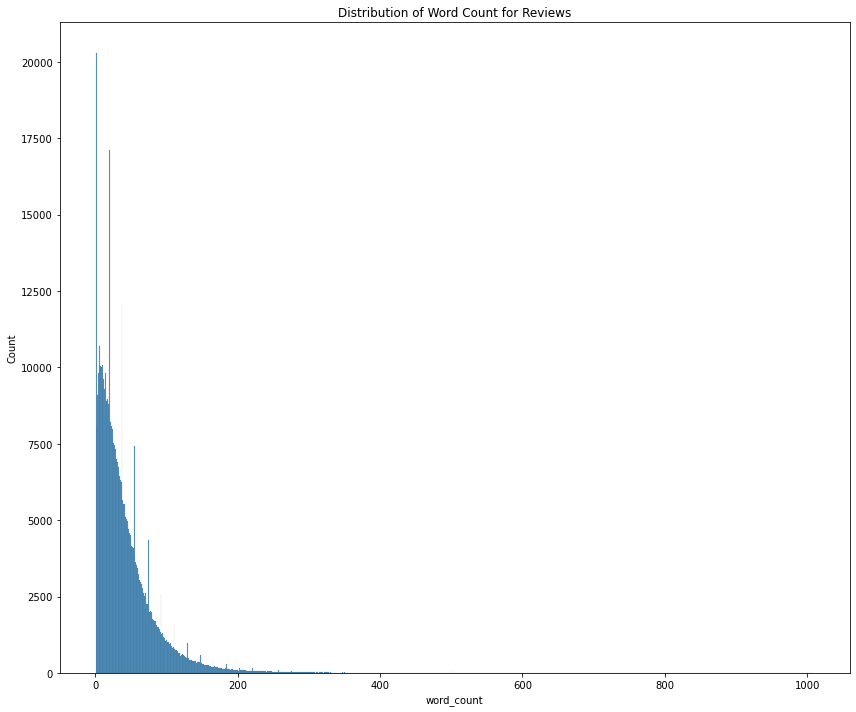

In [51]:
plt.figure(figsize = (12,10))
sns.histplot(data = reviews["word_count"] )
plt.title('Distribution of Word Count for Reviews')
plt.tight_layout();

In [52]:
reviews['word_count'].describe()

count    536674.000000
mean         42.843855
std          43.885027
min           1.000000
25%          14.000000
50%          31.000000
75%          57.000000
max        1009.000000
Name: word_count, dtype: float64

In [53]:
reviews[reviews['word_count']>=1000]

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_scores_rating,token_comments,lem_comments,word_count
304731,26716805,340188442,2018-10-23,5395149,Zara,i have stayed in a few different types of airb...,4.94,"[ have, stayed, in, a, few, different, t...",have stayed in a few different types of airbn...,1000
338744,29914464,638140747447803202,2022-05-30,72702714,Nina,so this was a very difficult review for me to ...,4.74,"[so, this, was, a, very, difficult, revi...",so this was a very difficult review for me to ...,1009
346977,30580730,473737433,2019-06-22,79552011,Patricia,so my boyfriend and i traveled to athens to ha...,4.76,"[so, my, boyfriend, and, i, traveled, to...",so my boyfriend and i traveled to athens to ha...,1000
416813,36173202,552272457,2019-10-21,26128496,Katerina,"the apartment was clean, and basically pretty ...",4.93,"[the, apartment, was, clean, and, basical...",the apartment was clean and basically pretty n...,1000
529588,618102724746453424,651627559126536060,2022-06-17,427728577,Robert,lets me start by saying athens is a beautiful ...,4.31,"[lets, me, start, by, saying, athens, is...",lets me start by saying athens is a beautiful ...,1002


In [54]:
reviews['comments'].iloc[338744]

'so this was a very difficult review for me to write. kay was a friendly person and although the listing mentions dan, i never heard from him so i am unsure if he owns the place or not. therefore, kay who assisted me in my questions and helpful is the person that i interacted with for my visit. pros:kay!  she scheduled taxi service to and from the airport which was about a 45 mins drive one way; she left detailed info to maintain the apartment and how to check out. it would have been difficult reserving taxi service if it had not been for her support due to not speaking greek. for that and the recommendations that she provided (ie, restaurant recommendations, etc) i am grateful.  cons:the entire neighborhood!  i lived in nyc, specifically harlem in the mid to late 90s and let me tell you, this neighborhood was about 1000 times worse. as soon as my family and i walked 5 mins, no matter the direction, away from the apartment, there were people getting high, smoking crack, and literally a

In [55]:
reviews[reviews['listing_id'] == 29914464][:5]

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_scores_rating,token_comments,lem_comments,word_count
338205,29914464,348268502,2018-11-13,7720535,Gigi,this is a lovely apartment in a great location...,4.74,"[this, is, a, lovely, apartment, in, a, ...",this is a lovely apartment in a great location...,61
338206,29914464,350396789,2018-11-19,9395229,Gady,a perfect place to stay in every respect - an ...,4.74,"[ perfect, place, to, stay, in, every, r...",perfect place to stay in every respect an ext...,85
338207,29914464,351265186,2018-11-22,103518059,Cristian Alexander,beautiful apartment in a nice area. dan and ka...,4.74,"[beautiful, apartment, in, a, nice, area,...",beautiful apartment in a nice area dan and kat...,38
338208,29914464,357409756,2018-12-10,8562693,Magda,"po przyjeździe zostaliśmy miło przywitani, mim...",4.74,"[po, przyjeździe, zostaliśmy, miło, przywi...",po przyjeździe zostaliśmy miło przywitani mimo...,117
338217,29914464,362409653,2018-12-26,122055097,Jacques,dans un vieux quartier central d' athenes aux ...,4.74,"[dans, un, vieux, quartier, central, d, ...",dans un vieux quartier central d athenes aux r...,28
